<a href="https://colab.research.google.com/github/Martipetti/MachineLearning/blob/develop-martipetti/Modelli/Rete%20Neurale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product

Download the data

In [120]:
link = 'http://tennis-data.co.uk/2023/2023.xlsx'
totalData = pd.read_excel(link)

Cleaning DataSet

In [121]:
totalData = totalData[totalData['Series'] == 'Grand Slam']

In [122]:
trainingSet = totalData[["Tournament", "Surface", "Round", "Winner", "Loser", "WRank", "LRank", "B365W", "B365L", "PSW", "PSL"]]

In [123]:
for column in trainingSet:
  trainingSet.dropna(subset=[column], inplace=True)

<ipython-input-123-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-123-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-123-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-123-ce7461797c1b>:2: Setting

In [125]:
trainingSet.reset_index(drop=True, inplace=True)
trainingSet.index = range(1, len(trainingSet) + 1)

In [126]:
nuovi_nomi_colonne = ["Tournament","Surface", "Round", "Player1", "Player2", "Rank1", "Rank2", "B1", "B2", "PS1", "PS2"]
trainingSet.columns = nuovi_nomi_colonne

In [127]:
trainingSet["target"] = 0

<ipython-input-127-60ba1f42b5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["target"] = 0


Mapping string to integer

In [128]:
trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
trainingSet["Surface"] = trainingSet["Surface"].astype("category")
trainingSet["Round"] = trainingSet["Round"].astype("category")
trainingSet["Player1"] = trainingSet["Player1"].astype("category")
trainingSet["Player2"] = trainingSet["Player2"].astype("category")

<ipython-input-128-1d9e29e86b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
<ipython-input-128-1d9e29e86b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = trainingSet["Surface"].astype("category")
<ipython-input-128-1d9e29e86b61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [129]:
trainingSet.dtypes

Tournament    category
Surface       category
Round         category
Player1       category
Player2       category
Rank1          float64
Rank2          float64
B1             float64
B2             float64
PS1            float64
PS2            float64
target           int64
dtype: object

In [130]:
label_encoder = LabelEncoder()
trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
trainingSet["Round"] = label_encoder.fit_transform(trainingSet["Round"])

<ipython-input-130-be19e985f5d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
<ipython-input-130-be19e985f5d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
<ipython-input-130-be19e985f5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [131]:
label_encoder = LabelEncoder()
label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
tmp_1 = label_encoder.transform(trainingSet["Player1"])
tmp_2 = label_encoder.transform(trainingSet["Player2"])
trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2

<ipython-input-131-98cfb96ab1d4>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
<ipython-input-131-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2
<ipython-input-131-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], train

Mixing the player to avoid the pattern with the winner on the first columns and the loser on the second one

In [132]:
trainingSet

,Tournament,Surface,Round,Player1,Player2,Rank1,Rank2,B1,B2,PS1,PS2,target,Player1Code,Player2Code
1,0,2,0,Moutet C.,Wu Y.,62.0,114.0,2.38,1.57,2.40,1.65,0,116,184
2,0,2,0,Watanuki Y.,Rinderknech A.,138.0,59.0,2.30,1.62,2.18,1.77,0,181,143
3,0,2,0,Van De Zandschulp B.,Ivashka I.,34.0,73.0,1.36,3.20,1.47,2.91,0,174,75
4,0,2,0,Etcheverry T.,Barrere G.,79.0,83.0,2.30,1.62,2.43,1.63,0,48,7
5,0,2,0,Sinner J.,Edmund K.,16.0,581.0,1.06,10.00,1.05,15.72,0,157,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2,2,4,Medvedev D.,Rublev A.,3.0,8.0,1.36,3.20,1.39,3.30,0,105,145
501,2,2,4,Alcaraz C.,Zverev A.,1.0,12.0,1.20,4.50,1.22,4.90,0,1,190
502,2,2,5,Djokovic N.,Shelton B.,2.0,47.0,1.06,10.00,1.09,9.76,0,42,154
503,2,2,5,Medvedev D.,Alcaraz C.,3.0,1.0,4.33,1.22,4.13,1.28,0,105,1


In [133]:
swap_rows = trainingSet.index[::2]

df_swapped = trainingSet.loc[swap_rows]
df_swapped['Player1Code'], df_swapped['Player2Code'] = df_swapped['Player2Code'], df_swapped['Player1Code']
df_swapped['target'] = 1
df_swapped['Rank1'], df_swapped['Rank2'] = df_swapped['Rank2'], df_swapped['Rank1']
df_swapped['B1'], df_swapped['B2'] = df_swapped['B2'], df_swapped['B1']
df_swapped['PS1'], df_swapped['PS2'] = df_swapped['PS2'], df_swapped['PS1']

trainingSet = pd.concat([trainingSet.loc[~trainingSet.index.isin(swap_rows)], df_swapped])

In [134]:
trainingSet = trainingSet.drop(["Player1", "Player2"], axis=1)

Scaling and splitting the data and rename the data set

In [135]:
trainingSet = shuffle(trainingSet)

In [136]:
X_train = trainingSet[trainingSet["Tournament"] != 3]
X_test = trainingSet[trainingSet["Tournament"] == 3]

In [137]:
y_train = X_train["target"]
y_test = X_test["target"]

In [138]:
X_train = X_train.drop(columns=["target"])
X_test = X_test.drop(columns=["target"])

In [139]:
standardScaler = StandardScaler()
X_train = pd.DataFrame(standardScaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(standardScaler.fit_transform(X_test), columns = X_test.columns)

In [140]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Creating the neural network model

In [141]:
model = Sequential([
    Dense(units=56, input_shape=(11,), activation='relu'),
    Dense(units=112, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [142]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 1s 56ms/step - loss: 0.6789 - accuracy: 0.5959 - val_loss: 0.6160 - val_accuracy: 0.6579
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6133 - accuracy: 0.6549 - val_loss: 0.5553 - val_accuracy: 0.7105
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5789 - accuracy: 0.6962 - val_loss: 0.5301 - val_accuracy: 0.6579
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5608 - accuracy: 0.7198 - val_loss: 0.5192 - val_accuracy: 0.6842
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5480 - accuracy: 0.7257 - val_loss: 0.5153 - val_accuracy: 0.6579
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.5378 - accuracy: 0.7345 - val_loss: 0.5129 - val_accuracy: 0.6579
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5282 - accuracy: 0.7316 - val_loss: 0.5141 - val_accuracy: 0.6579
Epoch 8/10
7/7 [=============

In [144]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [145]:
def correctValue(pred):
  for i in range(pred.shape[0]):
    value = pred[i]
    if (value[0]>value[1]):
      pred[i] = [1,0]
    else:
      pred[i] = [0,1]
  return pred

In [65]:
y_pred

array([[0.29883546, 0.7011644 ],
       [0.58533317, 0.41466677],
       [0.11933597, 0.88066393],
       [0.36903787, 0.63096213],
       [0.5306065 , 0.4693935 ],
       [0.58427924, 0.4157208 ],
       [0.50377107, 0.49622887],
       [0.52560407, 0.47439596],
       [0.62153304, 0.37846702],
       [0.5479605 , 0.45203945],
       [0.2964888 , 0.7035112 ],
       [0.43335482, 0.5666452 ],
       [0.43241856, 0.5675815 ],
       [0.5698598 , 0.43014014],
       [0.55125666, 0.44874325],
       [0.6121557 , 0.38784435],
       [0.58947897, 0.41052103],
       [0.3862544 , 0.61374557],
       [0.61474794, 0.38525212],
       [0.56615156, 0.43384847],
       [0.3460653 , 0.6539347 ]], dtype=float32)

In [146]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.521966278553009
Test accuracy: 0.7244094610214233


In [147]:
score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.521966278553009
Test accuracy: 0.7244094610214233


In [68]:
y_pred

array([[0.29883546, 0.7011644 ],
       [0.58533317, 0.41466677],
       [0.11933597, 0.88066393],
       [0.36903787, 0.63096213],
       [0.5306065 , 0.4693935 ],
       [0.58427924, 0.4157208 ],
       [0.50377107, 0.49622887],
       [0.52560407, 0.47439596],
       [0.62153304, 0.37846702],
       [0.5479605 , 0.45203945],
       [0.2964888 , 0.7035112 ],
       [0.43335482, 0.5666452 ],
       [0.43241856, 0.5675815 ],
       [0.5698598 , 0.43014014],
       [0.55125666, 0.44874325],
       [0.6121557 , 0.38784435],
       [0.58947897, 0.41052103],
       [0.3862544 , 0.61374557],
       [0.61474794, 0.38525212],
       [0.56615156, 0.43384847],
       [0.3460653 , 0.6539347 ]], dtype=float32)

In [148]:
y_pred = correctValue(y_pred)

In [149]:
y_test_first = np.array([tmp[0] for tmp in y_test])

In [150]:
y_pred_first = np.array([tmp[0] for tmp in y_pred])

In [151]:
def firstValue(pred):
  return np.array([tmp[0] for tmp in pred])

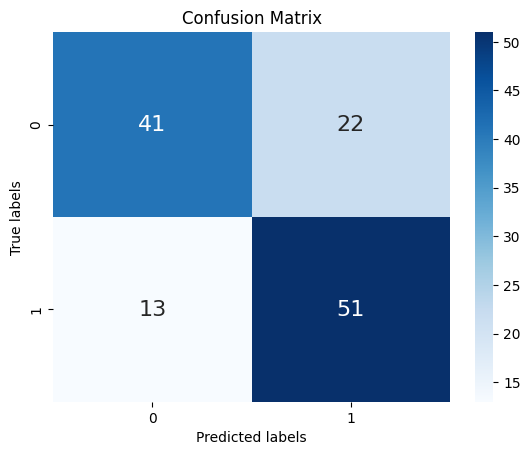

In [152]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [156]:
# Define the neural network model
def create_model(optimizer='adam', loss='binary_crossentropy', firstLayer=11, secondLayer=11, learning_rate=0.1):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer")

    model = Sequential()
    model.add(Dense(firstLayer, input_dim=11, activation='relu'))
    model.add(Dense(secondLayer, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model


# Define the hyperparameter grid
param_grid = {#'batch_size': [10, 20, 40, 50],
              'batch_size': [10, 20, 30],
              #'epochs': [ 20, 40, 50],
              'epochs': [10, 20, 30],
              'optimizer': ['adam', 'rmsprop'],
              #'loss': ['binary_crossentropy','categorical_crossentropy', 'hinge'],
              'loss': ['categorical_crossentropy'],
              'firstLayer': [11, 22, 50, 100],
              'secondLayer': [11, 22, 50, 100],
              'learning_rate': [0.001, 0.01, 0.1]}


# Initialize the best accuracy and the best hyperparameters
best_accuracy = 0
best_params = {}

# Loop over the hyperparameter grid
for params in product(*param_grid.values()):
    # Create the neural network model with the current hyperparameters
    model = create_model(params[2], params[3], params[4], params[5], params[6])

    # Train the model
    model.fit(X_train, y_train, batch_size=params[0], epochs=params[1], verbose=0)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    y_pred = correctValue(y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print("Hyperparameters: ", best_params)
    print("Accuracy: ", best_accuracy)
    print("------------------------------------------------")

    # Update the best accuracy and the best hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_accuracy)

4/4 [==============================] - 0s 5ms/step
Hyperparameters:  {}
Accuracy:  0
--------------------------------------
4/4 [==============================] - 0s 5ms/step
Hyperparameters:  (10, 10, 'adam', 'categorical_crossentropy', 11, 11, 0.001)
Accuracy:  0.6929133858267716
--------------------------------------
4/4 [==============================] - 0s 5ms/step
Hyperparameters:  (10, 10, 'adam', 'categorical_crossentropy', 11, 11, 0.01)
Accuracy:  0.7322834645669292
--------------------------------------
4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 'adam', 'categorical_crossentropy', 11, 11, 0.01)
Accuracy:  0.7322834645669292
--------------------------------------
4/4 [==============================] - 0s 5ms/step
Hyperparameters:  (10, 10, 'adam', 'categorical_crossentropy', 11, 11, 0.01)
Accuracy:  0.7322834645669292
--------------------------------------
4/4 [==============================] - 0s 5ms/step
Hyperparameters:  (10, 10, 'adam', '

In [157]:
y_test_first = firstValue(y_test)
y_pred_first = firstValue(y_pred)

In [163]:
model = Sequential()
model.add(Dense(22, input_dim=11, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics='accuracy')

In [176]:
model.fit(X_train, y_train, batch_size=30, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1179 - accuracy: 0.9496
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0725 - accuracy: 0.9708
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0524 - accuracy: 0.9920
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0504 - accuracy: 0.9867
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0460 - accuracy: 0.9894
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0426 - accuracy: 0.9920
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0441 - accuracy: 0.9894
Epoch 8/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0382 - accuracy: 0.9947
Epoch 9/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9973
Epoch 10/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9920


In [177]:
y_pred = model.predict(X_test)
y_pred = correctValue(y_pred)

4/4 [==============================] - 0s 4ms/step


In [179]:
y_pred_first = firstValue(y_pred)

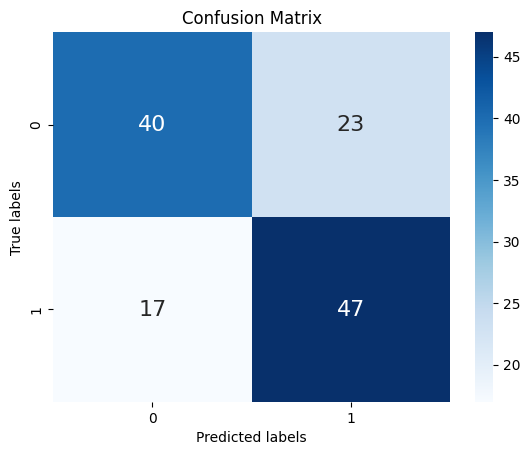

In [180]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()